# Predicting which team will win a football match

The purpose of this project is to use machine learning in order to make predictions regarding football matches. 
We have 5 .csv files, each file containing different data which might help in make predictions.

In [35]:
# importing neccesary libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
import itertools

%matplotlib inline

### Reading data from the files

In [36]:
# Read data from .csv files 

loc = "voetbal_1956-20220309/"

raw_cards_file = pd.read_csv (loc + '_cards.csv')
raw_goals_file = pd.read_csv (loc + '_goals.csv')
raw_matches_file = pd.read_csv (loc + '_matches.csv')
raw_players_file = pd.read_csv (loc + '_players.csv')
raw_subs_file = pd.read_csv (loc + '_subs.csv')

### Goals

In [37]:
# Method used to overwrite values found in column 'assist'
def assist(value):
    if pd.notna(value):
        return 1
    else:
        return 0

In [38]:
# Some clubs have different names 
# We replace it to one name 
raw_goals_file["home"].replace({"afc-ajax": "ajax-amsterdam" }, inplace=True)
raw_goals_file["away"].replace({"afc-ajax": "ajax-amsterdam" }, inplace=True)
raw_goals_file["team"].replace({"afc-ajax": "ajax-amsterdam" }, inplace=True)

# we drop the unneccesary columns 
filtered_assists = raw_goals_file.drop(columns=['new_score','type','minute','round'])

# We use assist function for both 'assist' and 'player' colunms to count the assists and goals for each game
filtered_assists['assist'] = raw_goals_file['assist'].apply(assist)
filtered_assists['player'] = raw_goals_file['player'].apply(assist)
filtered_assists

,Unnamed: 0,saison,home,away,team,player,assist
0,0,1956-1957,ajax-amsterdam,bvc-amsterdam,ajax-amsterdam,1,1
1,1,1956-1957,ajax-amsterdam,bvc-amsterdam,bvc-amsterdam,1,0
2,2,1956-1957,ajax-amsterdam,bvc-amsterdam,bvc-amsterdam,1,0
3,3,1956-1957,ajax-amsterdam,bvc-amsterdam,ajax-amsterdam,1,0
4,4,1956-1957,ajax-amsterdam,bvc-amsterdam,bvc-amsterdam,1,0
...,...,...,...,...,...,...,...
60864,639,2021-2022,willem-ii,sc-cambuur,willem-ii,1,1
60865,640,2021-2022,willem-ii,sc-cambuur,sc-cambuur,1,0
60866,641,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,1,1
60867,642,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,1,1


In [39]:
# Home team assist and goals
filterAssist = filtered_assists[(filtered_assists['assist'] == 1)]
groupByHomeAssist = filterAssist.groupby('home')['assist'].sum()
print(groupByHomeAssist.head())

# goals 
groupByHomeGoals = filtered_assists.groupby('home')['player'].sum()
print(groupByHomeGoals.head())

home
ado-den-haag       617
afc-dws             17
ajax-amsterdam    1596
az-alkmaar         825
blauw-wit            2
Name: assist, dtype: int64
home
ado-den-haag      2405
afc-dws            604
ajax-amsterdam    4299
az-alkmaar        2226
blauw-wit          348
Name: player, dtype: int64


In [40]:
# Away assist and goals 
groupByAwayAssist = filterAssist.groupby('away')['assist'].sum()
print(groupByAwayAssist.head())

# goals 
groupByAwayGoals = filtered_assists.groupby('away')['player'].sum()
print(groupByAwayGoals.head(101))

away
ado-den-haag       612
afc-dws             17
ajax-amsterdam    1308
az-alkmaar         838
blauw-wit            8
Name: assist, dtype: int64
away
ado-den-haag           2437
afc-dws                 628
ajax-amsterdam         3551
az-alkmaar             2392
blauw-wit               387
bvc-amsterdam           121
cambuur-leeuwarden      140
de-graafschap          1093
de-volewijckers         150
excelsior-rotterdam     139
fc-amsterdam            287
fc-den-bosch            824
fc-dordrecht            357
fc-eindhoven            169
fc-emmen                139
fc-groningen           2725
fc-twente              2938
fc-utrecht             3380
fc-volendam            1310
fc-wageningen           120
feyenoord              3211
feyenoord-rotterdam     157
fortuna-54              502
fortuna-sittard        1270
go-ahead-eagles        1570
go-ahead-eagles_2         3
helmond-sport           139
heracles-almelo        1136
hfc-haarlem             869
holland-sport           230
mvv     

### Cards

In [41]:
# The cards have different names and we convert them to numbers in order to count them 
df_card_filtered = raw_cards_file[(raw_cards_file['type'] == 'rode kaart') | 
                                  (raw_cards_file['type'] == 'gele kaart') |
                                  (raw_cards_file['type'] == 'gele') |
                                  (raw_cards_file['type'] == 'kaartgele') |
                                  (raw_cards_file['type'] == 'rode') |
                                  (raw_cards_file['type'] == 'kaartrode')  ]
            
df_card_filtered["type"].replace({"rode kaart": 2, "gele kaart": 1, "gele": 1 , "kaartgele" : 1 , "rode":2, "kaartrode" : 2 }, inplace=True)

# filter the home and away team 
filterHomeTeam = df_card_filtered[ (df_card_filtered['home'] == df_card_filtered['team'])]
filterAwayTeam = df_card_filtered[ (df_card_filtered['away'] == df_card_filtered['team'])]

C:\Users\malja\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [42]:
# Away yellow cards
filterAwayYellowCard = filterAwayTeam[(filterAwayTeam['type'] == 1)]
groupByAwayYellowCard = filterAwayYellowCard.groupby('away').sum()
groupByAwayYellowCard['type'].head(10)

print(f'{len(filterAwayYellowCard.index)} yellow cards is made by away team ')

17920 yellow cards is made by away team 


In [43]:
# Away red cards
filterAwayRedCard = filterAwayTeam[(filterAwayTeam['type'] == 2)]
print(f'{len(filterAwayRedCard.index)} red cards is made by away team ')

679 red cards is made by away team 


In [44]:
# Home yellow cards
filterHomeYellowCard = filterHomeTeam[(filterHomeTeam['type'] == 1)]
groupByHomeYellowCard = filterHomeYellowCard.groupby('home').sum()
groupByHomeYellowCard

print(f'{len(filterHomeYellowCard.index)} yellow cards is made by home team ')

12578 yellow cards is made by home team 


In [45]:
# Home red cards 
filterHomeRedCard = filterHomeTeam[(filterHomeTeam['type'] == 2)]
print(f'{len(filterHomeRedCard.index)} red cards is made by home team ')

415 red cards is made by home team 


### Players

In [46]:
# we drop the unneccesary columns 
raw_players_file.drop(columns=['round'])

,index,saison,home,away,team,player,started
0,0,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,eddy-pieters-graafland,True
1,1,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,cor-geelhuizen,True
2,2,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,ger-van-mourik,True
3,3,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,ad-visser,True
4,4,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,piet-ouderland,True
...,...,...,...,...,...,...,...
531095,9368,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,vito-van-crooij,False
531096,9369,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,mario-engels,False
531097,9370,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,benjamin-van-leer,False
531098,9371,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,tim-coremans,False


In [47]:
# we replace the 'started' column to numbers in order to count them
raw_players_file["started"].replace({True: 1, False: 0}, inplace=True)

# filter the home and away team 
filterHomeTeamPlayers = raw_players_file[ (raw_players_file['home'] == raw_players_file['team'])]
filterAwayTeamPlayers = raw_players_file[ (raw_players_file['away'] == raw_players_file['team'])]

# How much players play Home
filterStartedPlayersHome = filterHomeTeamPlayers[ (filterHomeTeamPlayers['started'] == 1)]
print(f'{len(filterStartedPlayersHome.index)} players play home')
# How much players did not play Home
filterNotStartedPlayersHome = filterHomeTeamPlayers[ (filterHomeTeamPlayers['started'] == 0)]
print(f'{len(filterNotStartedPlayersHome.index)} players did not play home')

# How much players play Away
filterStartedPlayersAway = filterAwayTeamPlayers[ (filterAwayTeamPlayers['started'] == 1)]
print(f'{len(filterStartedPlayersAway.index)} players play away')
# How much players did not play Away
filterNotStartedPlayersAway = filterAwayTeamPlayers[ (filterAwayTeamPlayers['started'] == 0)]
print(f'{len(filterNotStartedPlayersAway.index)} players did not play away')

212686 players play home
49729 players did not play home
217217 players play away
51468 players did not play away


### Matches

In [48]:
# we drop the unneccesary columns 
filtered_matches = raw_matches_file.drop(columns=['stadium','home_first_card','home_last_card',
                                                 'away_first_card', 'time','date','round',
                                                 'spectators', 'ref','linesman1','linesman2', 'away_last_card',
                                                 'home_yellow', 'home_yelred', 'away_yellow','first_goal', 'last_goal',
                                                  'away_red','home_red', 'away_yelred'])

# drop the empty rows
filtered_matches.dropna()
filtered_matches

,Unnamed: 0,saison,home,away,home_score,away_score
0,0,1956-1957,afc-ajax,bvc-amsterdam,2,3
1,1,1956-1957,afc-ajax,fc-den-bosch,1,0
2,2,1956-1957,afc-ajax,fc-utrecht,1,2
3,3,1956-1957,afc-ajax,feyenoord,1,0
4,4,1956-1957,afc-ajax,fortuna-54,0,2
...,...,...,...,...,...,...
19925,301,2021-2022,willem-ii,rkc-waalwijk,3,1
19926,302,2021-2022,willem-ii,sc-cambuur,1,3
19927,303,2021-2022,willem-ii,sc-heerenveen,0,0
19928,304,2021-2022,willem-ii,sparta-rotterdam,0,3


In [49]:
# WinningHomeTeamFilter
WinningHomeTeamFilter = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score'])]
print(f'The Home team won {len(WinningHomeTeamFilter.index)} matches')

# WinningAwayTeamFilter
WinningAwayTeamFilter = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score'])]
print(f'The Away team won {len(WinningAwayTeamFilter.index)} matches')

# DrawFilter
DrawTeamFilter = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score'])]
print(f'The draw was in {len(DrawTeamFilter.index)} matches')

The Home team won 9458 matches
The Away team won 5416 matches
The draw was in 5056 matches


### Changing the players

In [50]:
# How much subs did the home and away teams made 
# we drop the unneccesary columns 
filtered_subs = raw_subs_file.drop(columns=['minute','player','round','saison'])
filtered_subs["in"].replace({False: 0, True: 1 }, inplace=True)

filterHomeTeamSubs = filtered_subs[ (filtered_subs['home'] == filtered_subs['team'])]
filterAwayTeamSubs = filtered_subs[ (filtered_subs['away'] == filtered_subs['team'])]

# How much subs Home team made
filterSubsHome = filterHomeTeamSubs[ (filterHomeTeamSubs['in'] == 1)]
print(f'{len(filterSubsHome.index)} subs the home team made')

# How much subs Away team made
filterSubsAway = filterAwayTeamSubs[ (filterAwayTeamSubs['in'] == 1)]
print(f'{len(filterSubsAway.index)} subs the Away team made')

31728 subs the home team made
32505 subs the Away team made


### AJAX VS PSV Stats

#### Goals

In [58]:
ajaxGoalsHome = filterAssist[ (filterAssist['home'] == 'ajax-amsterdam')]

print(f'Ajax Amsterdam Home Goals {len(ajaxGoalsHome.index)}')


ajaxGoalsAway = filterAssist[ (filterAssist['away'] == 'ajax-amsterdam')]

print(f'Ajax Amsterdam Away Goals {len(ajaxGoalsAway.index)}')


psvGoalsHome = filterAssist[ (filterAssist['home'] == 'psv-eindhoven')]

print(f'psv eindhoven Home Goals {len(psvGoalsHome.index)}')

psvGoalsAway = filterAssist[ (filterAssist['away'] == 'psv-eindhoven')]

print(f'psv eindhoven Away Goals {len(psvGoalsAway.index)}')

Ajax Amsterdam Home Goals 1596
Ajax Amsterdam Away Goals 1308
psv eindhoven Home Goals 1023
psv eindhoven Away Goals 947


<AxesSubplot:>

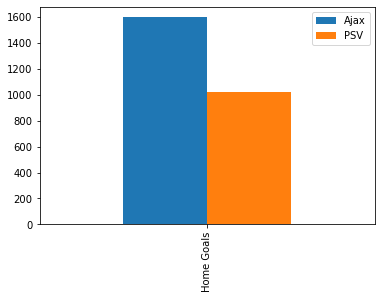

In [63]:
plotdata = pd.DataFrame({
    "Ajax": len(ajaxGoalsHome.index),
    "PSV": len(psvGoalsHome.index)
    }, 
    index=["Home Goals"]
)
plotdata.plot(kind="bar")

<AxesSubplot:>

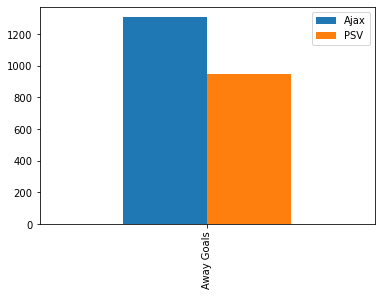

In [64]:
plotdata = pd.DataFrame({
    "Ajax": len(ajaxGoalsAway.index),
    "PSV": len(psvGoalsAway.index)
    }, 
    index=["Away Goals"]
)
plotdata.plot(kind="bar")